# The Sparks Foundation

# Graduate Rotational Internship Program

# Task 5

# Exploratory Data Analysis - Sports

(Level - Advanced)
● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
● As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.
● Suggest teams or players a company should endorse for its products.

# by Sandeep VY

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [4]:
matches = pd.read_csv('matches.csv')
deliveries =pd.read_csv('deliveries.csv')

# Print the data of the file

In [5]:
print(deliveries.tail())
print(matches.tail())

        match_id  inning         batting_team    bowling_team  over  ball  \
179073     11415       2  Chennai Super Kings  Mumbai Indians    20     2   
179074     11415       2  Chennai Super Kings  Mumbai Indians    20     3   
179075     11415       2  Chennai Super Kings  Mumbai Indians    20     4   
179076     11415       2  Chennai Super Kings  Mumbai Indians    20     5   
179077     11415       2  Chennai Super Kings  Mumbai Indians    20     6   

          batsman non_striker      bowler  is_super_over  ...  bye_runs  \
179073  RA Jadeja   SR Watson  SL Malinga              0  ...         0   
179074  SR Watson   RA Jadeja  SL Malinga              0  ...         0   
179075  SR Watson   RA Jadeja  SL Malinga              0  ...         0   
179076  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   
179077  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
179073    

In [6]:
print(deliveries.describe())
print()
print(matches.describe())
print()

            match_id         inning           over           ball  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957       1.482952      10.162488       3.615587   
std      3472.322805       0.502074       5.677684       1.806966   
min         1.000000       1.000000       1.000000       1.000000   
25%       190.000000       1.000000       5.000000       2.000000   
50%       379.000000       1.000000      10.000000       4.000000   
75%       567.000000       2.000000      15.000000       5.000000   
max     11415.000000       5.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.000452       0.036721       0.004936       0.021136   
std         0.021263       0.251161       0.116480       0.194908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [7]:
print(deliveries.info())
print()
print(matches.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Find NULL value of the each field

In [9]:

print('Null Values Of Matches: \n',matches.isnull().sum())
print()
print('Null Values Of Deliveries: \n',deliveries.isnull().sum())
print()

Null Values Of Matches: 
 id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Null Values Of Deliveries: 
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dism

# Overview of dataset

In [14]:

print("----------------------------")
print("Overview of dataset\n")
print("Numbers of matches played : ",matches.shape[0])
print("\nNumbers of seasons played : ",matches['season'].value_counts())
print("\nTop 10 well played Players of IPL : \n",matches['player_of_match'].value_counts()[:10])
print("\nMost Winning Team and Number Of Matches: \n",matches['winner'].value_counts())
print("\nMost Winning Team: \n",matches['winner'].value_counts().idxmax())
print("\nPlayer Of The Match & Number Of Matches : \n",matches['player_of_match'].value_counts())
print("\nPlayer who played the max matches : \n",matches['player_of_match'].value_counts().idxmax())

----------------------------
Overview of dataset

Numbers of matches played :  756

Numbers of seasons played :  2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

Top 10 well played Players of IPL : 
 CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

Most Winning Team and Number Of Matches: 
 Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Su

# returns all columns for the win_by_run max values

In [13]:

print()
print("All columns for the win_by_run max values :\n ")
print(matches.iloc[matches['win_by_runs'].idxmax()])


All columns for the win_by_run max values :
 
id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


# which team won by maximum wickets?

In [15]:

print()
print("which team won by maximum wickets ?")
print(matches.iloc[matches['win_by_wickets'].idxmax()]['winner'])


which team won by maximum wickets ?
Kolkata Knight Riders


# team which won by maximum runs

In [16]:

print()
print("which team won by maximum runs ?")
print(matches.iloc[matches['win_by_runs'].idxmax()]['winner'])


which team won by maximum runs ?
Mumbai Indians


# which team won by minimum runs?

In [17]:
print()
print("which team won by minimum runs ?")
print(matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner'])


which team won by minimum runs ?
Mumbai Indians


# which season had most number of matches?


which season had most number of matches?


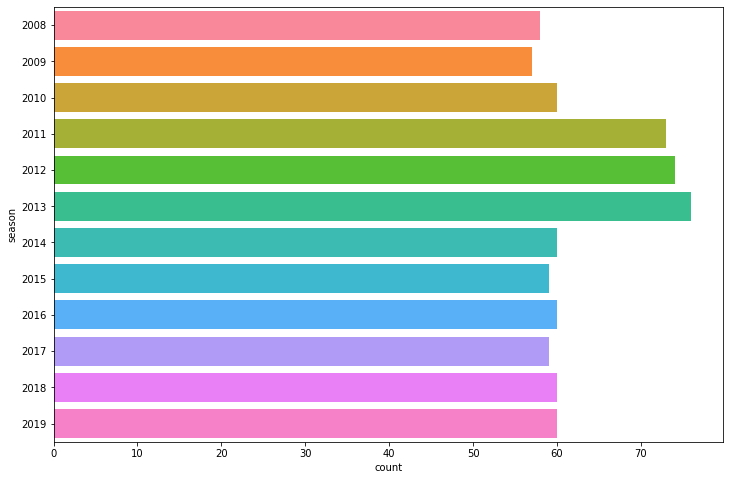

In [48]:

print("\nwhich season had most number of matches?")
sns.countplot(y="season", saturation=1, data=matches)
plt.show()

# which is the most successful IPL team ?


which is the most successful IPL team ?


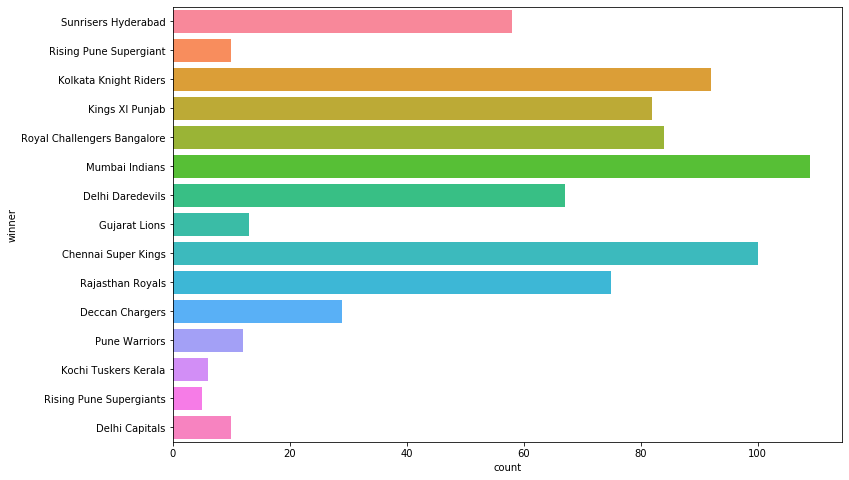

In [49]:

print("\nwhich is the most successful IPL team ?")
sns.countplot(y='winner',saturation=1, data=matches)
pyplot.show()

In [104]:
plt.rcParams['figure.figsize'] = (5,3)

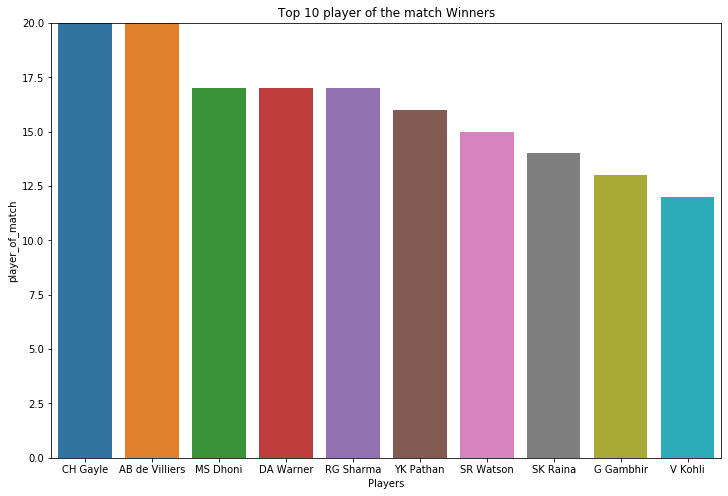

In [47]:
top_players = matches['player_of_match'].value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_xlabel("Players")
ax.set_title("Top 10 player of the match Winners")
sns.barplot(x = top_players.index, y = top_players, orient='v')
pyplot.show()

# Is winning the toss lead to winning the match!!!

False    363
True     393
dtype: int64


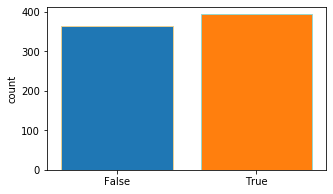

In [105]:

match_toss = matches['toss_winner'] == matches['winner']
print(match_toss.groupby(match_toss).size())
sns.countplot(match_toss, saturation=1, edgecolor=sns.color_palette("BrBG", 2))
plt.show()

In [56]:
# merge season value from the matches dataframe to deliveries
runs = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

#get sum of scores by batting and bowling teams
high_scores = runs.groupby(['match_id','season','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 

#slice by runs greater than 200
high_scores = high_scores[high_scores['total_runs']>=200]

In [57]:
def barplot(x_axis, y_axis, plot_data, title, x_label, y_label):
    """Bar plot using seaborn library"""
    plot = sns.barplot(x=x_axis, y=y_axis, data=plot_data)
    plot.set(xlabel=x_label, ylabel=y_label)
    plot.set_title(title)
    pyplot.show()

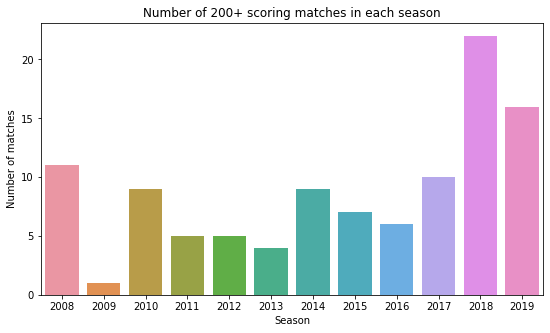

In [60]:
barplot('season', 'match_id', high_scores.groupby(['season'])['match_id'].count().reset_index(), 'Number of 200+ scoring matches in each season', 'Season', 'Number of matches')
plt.show()

# count plots comparing scoring and conceding teams

In [95]:
high_scores = deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
#high score in 1st innings
firstinning_scores = high_scores[high_scores['inning']==1]
#high score in 2nd innings
secondinning_scores = high_scores[high_scores['inning']==2]
#merge to get complete match scores
fullmatch_scores = firstinning_scores.merge(secondinning_scores[['match_id', 'inning', 'total_runs']], on='match_id')


In [96]:
#rename columns based on 1st and 2nd innings
fullmatch_scores.rename(columns={'inning_y':'inning_2','total_runs_x':'inning1_runs','inning_x':'inning_1','total_runs_y':'inning2_runs'},inplace=True)
fullmatch_scores = fullmatch_scores[fullmatch_scores['inning1_runs']>=200]

#engineer new column to get if the score was chased successfully or not
fullmatch_scores['chase_success'] = 1
fullmatch_scores['chase_success'] = np.where(fullmatch_scores['inning1_runs']<=fullmatch_scores['inning2_runs'], 'yes', 'no')


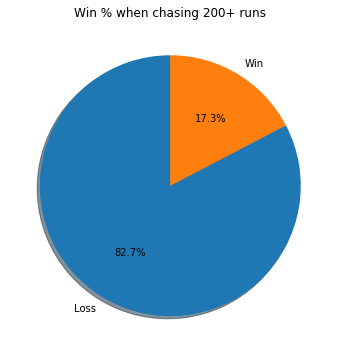

In [97]:
#pie plot success rate of teams batting second
counts = fullmatch_scores['chase_success'].value_counts().reset_index().chase_success
labels = ['Loss','Win']
plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plot = plt.gcf()
plot.set_size_inches(6,6)
plt.title("Win % when chasing 200+ runs")
plt.show()

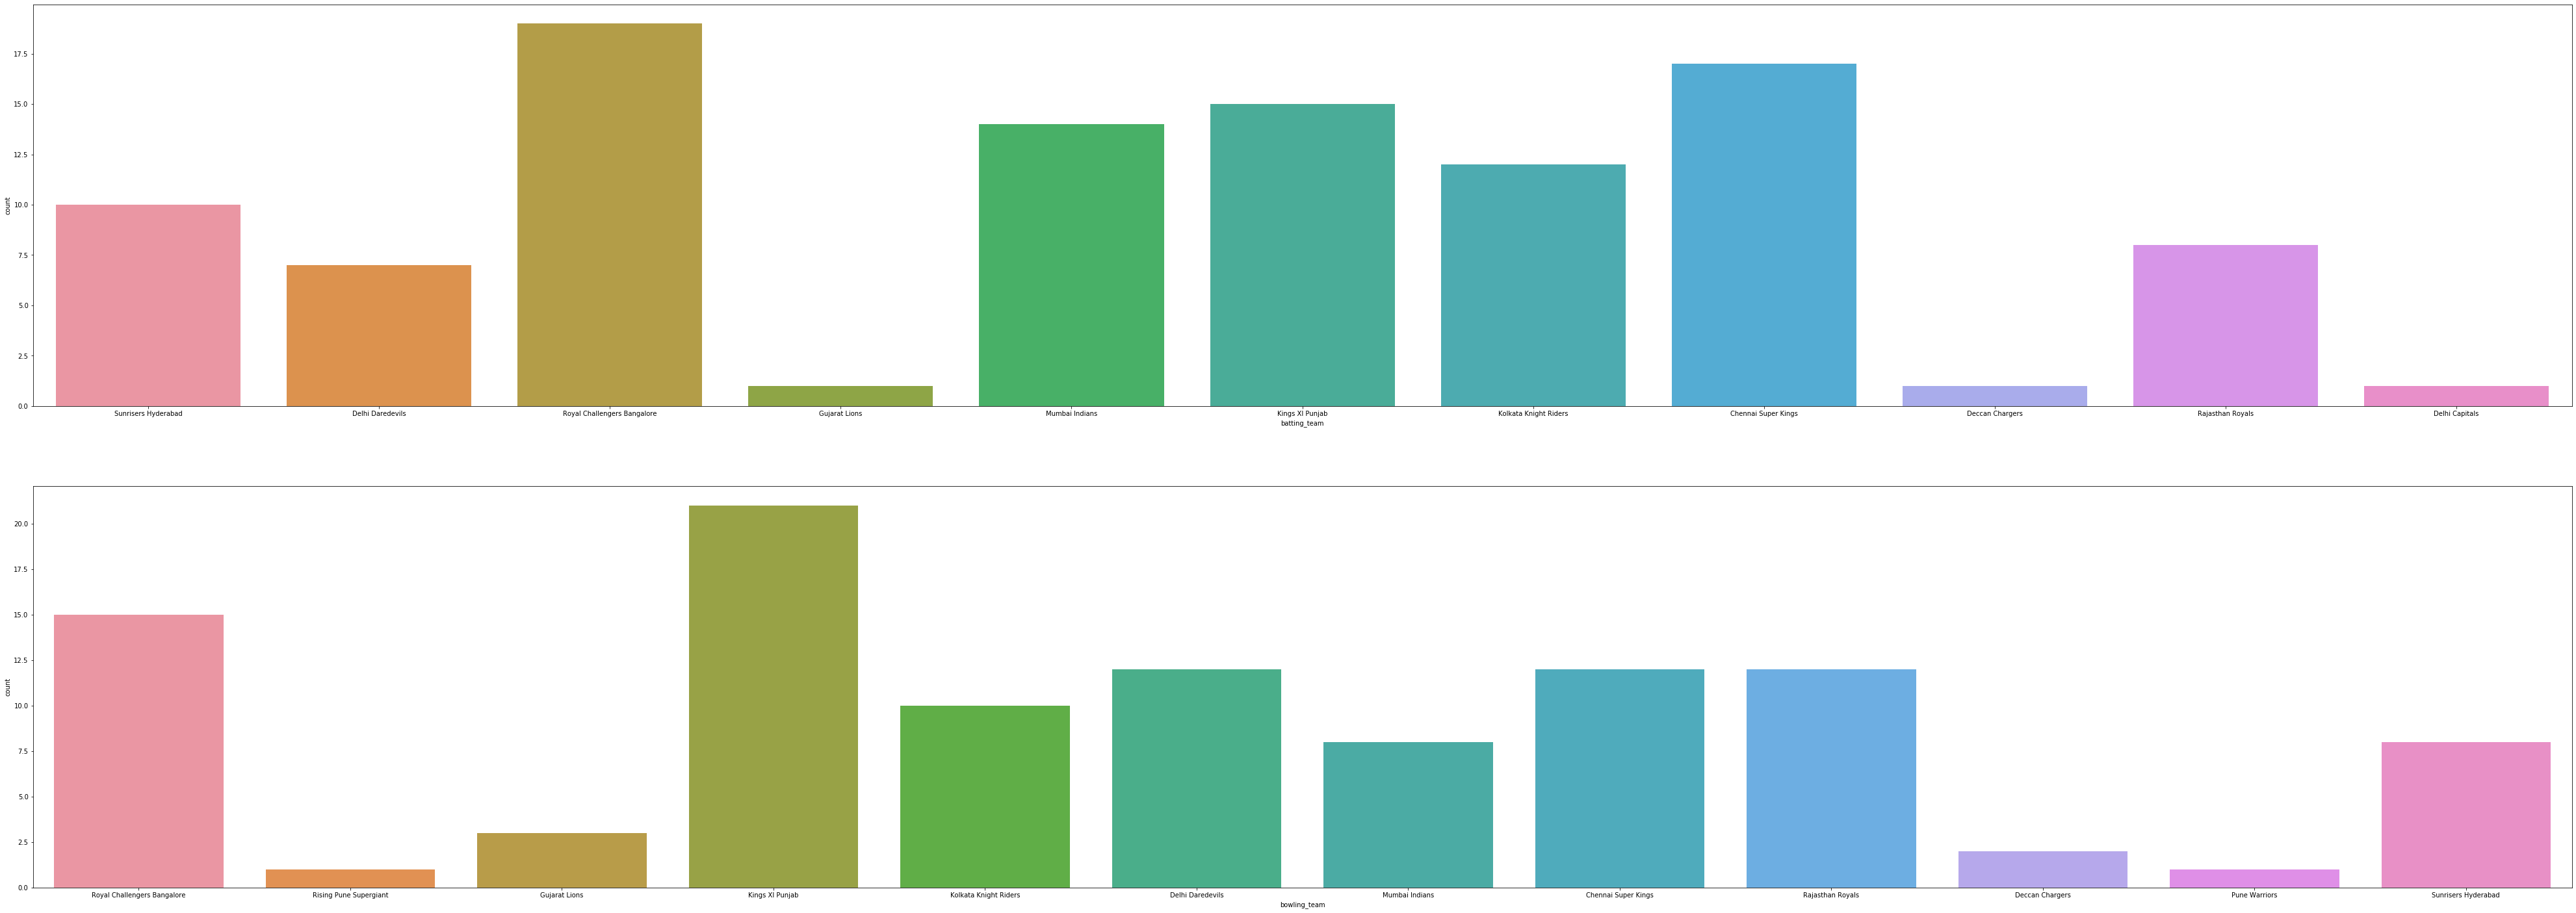

In [94]:

plot, ax =plt.subplots(2,1)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
pyplot.show()